<a href="https://colab.research.google.com/github/joao-pires/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Vancouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Vancouver

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Vancouver, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - Summary information and metrics for listings in Vancouver (good for visualisations).


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2019-11-09/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do proprietário
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,60,16,2017-02-26,0.16,43,311
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,225,2019-10-22,1.90,1,183
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,152,30,57,2019-06-30,0.48,3,316
3,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,84,2019-09-14,0.82,1,296
4,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24974,-123.08108,Entire home/apt,140,2,31,2018-07-08,0.28,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`, há uma versão mais completa.

In [55]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}\n".format(df.shape[0]))

# verificar os tipos de entradas do dataset
display(df.dtypes)


Variáveis:	 16
Entradas:	 6181



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [14]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
pd.options.mode.use_inf_as_na = True
a = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
porcentagem = pd.DataFrame(a)
porcentagem.style.format("{:.2%}")

,0
neighbourhood_group,100.00%
reviews_per_month,13.31%
last_review,13.31%
host_name,0.10%
name,0.02%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%


### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

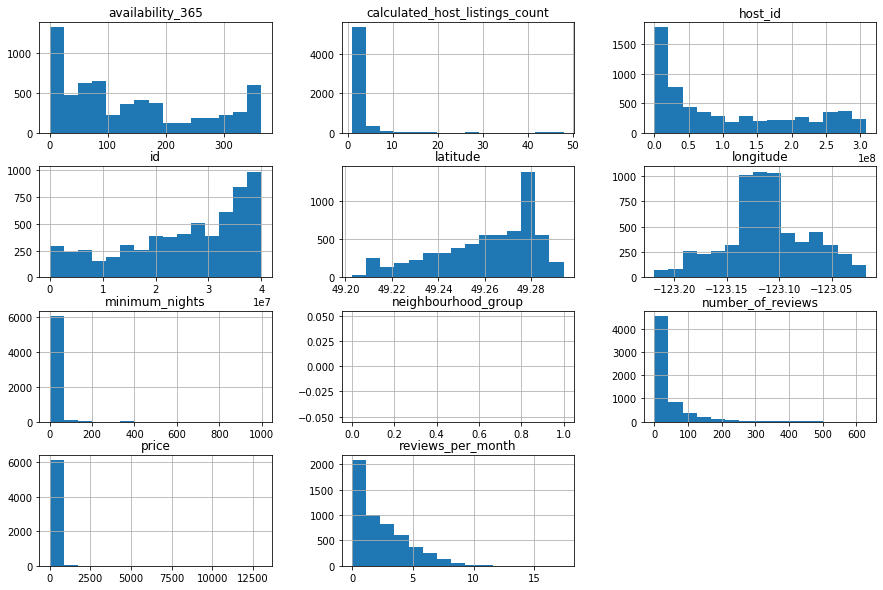

In [21]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma é possível identificar indicíos da presença de *outliers* (inconsistência). Olhe por exemplo as variáveis `price` e `minimum_nights`. 

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers* São elas:

* Resumo estatístico por meio do método `describe()`
* plotar `boxplots` para a variável

In [24]:
# ver a média da coluna `price`
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,6181.000000,6181.000000
mean,180.013914,11.721243
std,306.978613,29.570367
min,15.000000,1.000000
25%,85.000000,1.000000
50%,129.000000,2.000000
75%,199.000000,14.000000
max,13000.000000,998.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 199, porém seu valor máximo é 13000.
* A quantidade mínima de noites (minium_nights) está acima do limite real de 365 dias no ano.

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma. 

Para isso vamos usar como corte uma diária de 1500 reais e quantidade mínima de noites de 30 dias. 



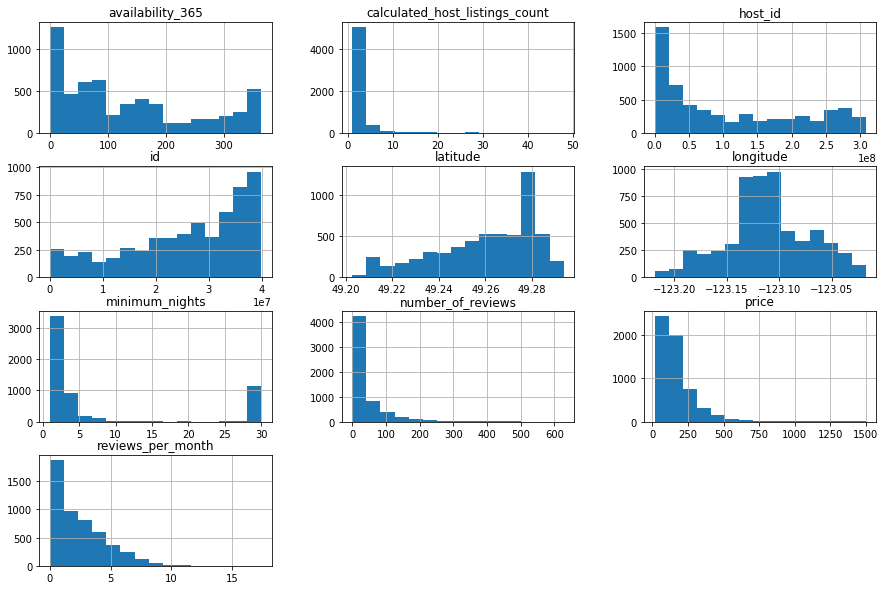

In [29]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**


Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a itensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [36]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.114848,-0.111414,-0.062505,-0.107954,0.057197
minimum_nights,-0.114848,1.000000,-0.152823,-0.366149,0.254247,0.146015
number_of_reviews,-0.111414,-0.152823,1.000000,0.466874,-0.140952,0.038358
reviews_per_month,-0.062505,-0.366149,0.466874,1.000000,-0.173988,0.001306
calculated_host_listings_count,-0.107954,0.254247,-0.140952,-0.173988,1.000000,0.164147
availability_365,0.057197,0.146015,0.038358,0.001306,0.164147,1.000000


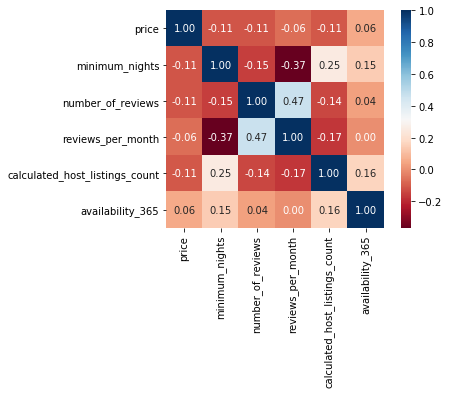

In [37]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna variável `room_type` indica o tipo de locação que está anunciada no AirBnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [38]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    4123
Private room       1605
Shared room          59
Hotel room           39
Name: room_type, dtype: int64

In [41]:
# mostrar a porcentagem de cada tipo de imóvel disponível
b = df_clean.room_type.value_counts() / df_clean.shape[0]
porcentagem_b = pd.DataFrame(b)

porcentagem_b.style.format("{:.2%}")


,room_type
Entire home/apt,70.77%
Private room,27.55%
Shared room,1.01%
Hotel room,0.67%


### **Q7. Qual a localidade mais cara de Vancouver?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros *(neighbourhood)* a partir do preço de locação.



In [42]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Downtown             217.362055
Shaughnessy          202.509434
Dunbar Southlands    195.125654
Kitsilano            194.749460
Downtown Eastside    189.388715
West End             185.415094
Arbutus Ridge        174.905660
West Point Grey      173.897638
Mount Pleasant       173.744548
Fairview             164.711409
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitutes para os imovéis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`. 

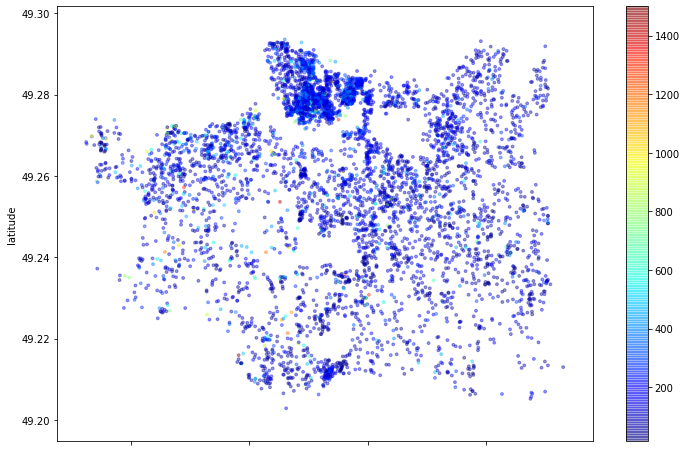

In [49]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter" , x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], 
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

Se compararmos com o mapa da cidade de Vancouver podemos notar que a maior concentração de imovéis é no bairro West End.

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Após a limpeza dos *outliers* podemos estimar que a média do mínimo de noites para o aluguel *(minium_nights)* são de 7 dias.

In [54]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].describe()

,minimum_nights
count,5826.000000
mean,7.787504
std,11.204543
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,30.000000


## Conclusões


Foi feita apenas uma análise superficial na base de dados do AirBnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que algumas localidades há poucos imovéis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos. 

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para abordagem inicial.

